nodes visited   7667200000
cache space     30000034
nodes stored    30000034
nodes forgotten 5030436783
current depth   14
current node    63 12 46 32 17 34 15 57 74 53 81 65 16 31
role: min
  root: work: 1290391283 pn0:    INF pn1:  25335 dn0:      0 dn1:  11442 

role: max
(7, 4): work: 230072010 pn0:  10586 pn1:   5117 dn0:  15631 dn1:  18636 
(8, 3): work: 279820874 pn0:  20359 pn1:   4137 dn0:  15536 dn1:  16380 
(6, 3): work: 458690445 pn0:    INF pn1:   3339 dn0:      0 dn1:  11442 
(7, 5): work:  76004777 pn0:   6284 pn1:   5135 dn0:  15801 dn1:  15801 
(8, 5): work:  57864927 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(6, 5): work:  95947984 pn0:   7482 pn1:   4158 dn0:  15663 dn1:  15699 
(8, 4): work:  91990265 pn0:   6573 pn1:   3449 dn0:  15564 dn1:  15823 

expanding move (6, 3)
role: min
(0, 1): work: 207414770 pn0:  31353 pn1:  25899 dn0:     33 dn1:   3985 
(1, 2): work: 286721306 pn0:  34161 pn1:  25751 dn0:     99 dn1:   4070 
(0, 2): work: 292024174 pn0:  3122

KeyboardInterrupt: 

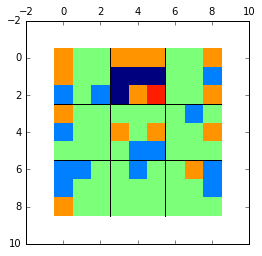

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,4),(2,4),(0,8),(2,8),(4,3),(4,5)]:
    board[x]=1
for o in [(6,0),(7,0),(5,4),(5,5),(6,4),(6,8),(7,8),]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(4,0),(3,0),(2,0),(8,0),(6,1),(0,5),(1,8),(4,8),(3,7),(0,3),(2,2),(6,7)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()

sols = {}
with open('Stephen.txt','a') as file_:
    file_.write('\n' + '*'*30 + '\nStarting a new run\n' + '*'*30 + '\n'*2)
for move in game.legal_moves()[0:1]:
    with open('Stephen.txt','a') as file_:
        file_.write('*'*30 + '\nmove ' + str(move) + '\n' + '*'*30 + '\n')
# for move in [(3,1)]:
    game.update_move(move)
#     game.update_move((3,0))
    for move2 in game.legal_moves():
#     for move2 in [(0,5)]:
        dfpn.init()
        game.update_move(move2)
#         game.update_move((2,2))
        node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
        if node[2] == 0:
            node_print = 'Stephen wins'
        elif node[5] == 0:
            node_print = "Todd wins"
        elif node[3]==node[4]==0:
            node_print = 'tie'
        sols[(move,move2)]=node_print
        with open('Stephen.txt','a') as file_:
            file_.write('moves {}{} - {}\n'.format(move,move2,node_print))
        for _ in xrange(len(game.log) - log_len-1):
            game.erase_move()

    game.erase_move()
    assert(len(game.log) == log_len)
print 'time',time.clock() - t0

print sols
# print tree